In [1]:
# !pip install 'qiskit[visualization]'
# !pip install qiskit-ibm-runtime
# !pip install python-dotenv

1. Map the problem to circuits & operators 
2. Optimize the circuit 
3. Execute it in a backend 
4. Post-process the results

## Step 1. Map the problem to circuits & operators

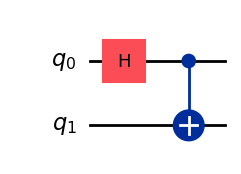

In [2]:
from qiskit import QuantumCircuit
 
# Create a new circuit with two qubits
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
 
# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")

In [3]:
from qiskit.quantum_info import Pauli

ZZ = Pauli("ZZ")
ZI = Pauli("ZI")
IZ = Pauli("IZ")
XX = Pauli("XX")
XI = Pauli("XI")
IX = Pauli("IX")

observables = [ZZ, ZI, IZ, XX, XI, IX]

## Step 2. Optimize the circuits

In [4]:
from dotenv import load_dotenv
load_dotenv()
import os

# os.environ['IBM_API_KEY']

In [5]:
# Use the following code instead if you want to run on a simulator:
 
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2

# service = QiskitRuntimeService(channel="ibm_quantum", token=os.environ['IBM_API_KEY'])
# backend = service.least_busy(simulator=False, operational=True)
backend = FakeAlmadenV2()

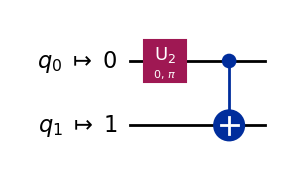

In [6]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
isa_circuit.draw("mpl", idle_wires=False)

## Step 3. Execute using the quantum primitives

In [7]:
# !pip install qiskit_aer

In [8]:
# from qiskit_aer.primitives import Estimator
# estimator = Estimator()
# job = estimator.run([qc]*len(observables), observables)
# job.result()

In [9]:
from qiskit_ibm_runtime import EstimatorV2 as Estimator

estimator = Estimator(backend)
mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]
 
job = estimator.run([(isa_circuit, mapped_observables)])

# This is the result of the entire submission.  You submitted one Pub,
# so this contains one inner result (and some metadata of its own).
 
job_result = job.result()
 
# This is the result from our single pub, which had five observables,
# so contains information on all five.
 
pub_result = job.result()[0]

In [10]:
pub_result

PubResult(data=DataBin(evs=np.ndarray(<shape=(6,), dtype=float64>), stds=np.ndarray(<shape=(6,), dtype=float64>), shape=(6,)), metadata={'target_precision': 0.015625, 'shots': 4096, 'circuit_metadata': {}})

## Step 4. Post-process the results

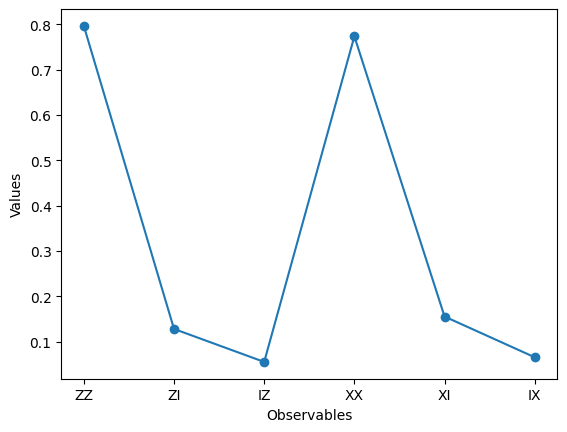

In [11]:
# Plot the result
 
from matplotlib import pyplot as plt
 
values = pub_result.data.evs
 
errors = pub_result.data.stds
 
# plotting graph
observables_labels = ["ZZ", "ZI", "IZ", "XX", "XI", "IX"]
plt.plot(observables_labels, values, "-o")
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()

In [ ]:
# expectation * observable creates the density matrix